# Recurrent neural network
Train a recurrent neural network to output "ihello" from "hihell"
If error about float and longtensor then check the input of the network, cast it to float most of the time will be fine.

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

import numpy as np

# Number of seq_len is len(example)-1 == time steps
seq_len = 6 # |hihell|==6
# Number of batches
batch_size = 1
# Number of features
input_size = 5 
# Hidden size, output size
hidden_size = 5   
# Number of layers
num_layer=1
# One hot encoding for each char in 'h','i','e','l','o'
h = [1, 0, 0, 0, 0]
i = [0, 1, 0, 0, 0]
e = [0, 0, 1, 0, 0]
l = [0, 0, 0, 1, 0]
o = [0, 0, 0, 0, 1]

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hihell -> ihello

# The input need to match this format: (seg_len, batch_size, input_size)
input = torch.tensor([h, i, h, e, l, l], dtype = torch.float)
input = input.view(seq_len, batch_size, input_size)

# Same with target (1, batch_size, hidden_size)
y_data = [1, 0, 2, 3, 3, 4]    # ihello
target = torch.tensor(y_data)
print(input.size(), target.size())

# Create random hidden state
state = torch.randn(num_layer, batch_size, hidden_size)

# Create RNN 
rnn = nn.RNN(input_size=input_size, 
             hidden_size=hidden_size, 
             num_layers=1, 
             nonlinearity='tanh')

# Use optim
parameters = rnn.parameters()
optimizer = torch.optim.Adam(parameters, lr = 1e-2)
# Loss function
criterion = torch.nn.CrossEntropyLoss()

loss_value = []
iteration = []
# Train
for epoch in range(200):
    out,state = rnn(input,state)
    out = out.view(seq_len, -1)
    res =  [idx2char[x] for x in torch.argmax(out, dim=1)]
    print(res)
    # print(target)
    loss = criterion(out,target)
    print('loss = ',loss.item())
    print('---------------------\n')
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
    loss_value.append(loss)
    iteration.append(epoch)

torch.Size([6, 1, 5]) torch.Size([6])
['l', 'l', 'l', 'o', 'i', 'i']
loss =  1.5760868787765503
---------------------

['l', 'l', 'l', 'l', 'l', 'i']
loss =  1.5262428522109985
---------------------

['l', 'l', 'l', 'l', 'l', 'i']
loss =  1.5057872533798218
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.485207438468933
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.46505606174469
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.4454827308654785
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.4264917373657227
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.4079828262329102
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.3898086547851562
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.3718252182006836
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.3539077043533325
---------------------

['l', 'l', 'l', 'l', 'l', 'l']
loss =  1.335959553718567
-----------------

# Plotting the result

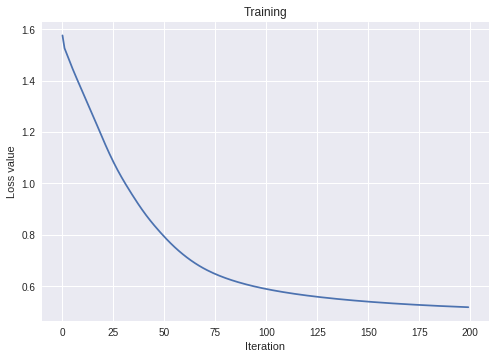

In [66]:
# Plotting
plt.plot(iteration, loss_value)

# Add x label
plt.xlabel('Iteration')
# Add y label
plt.ylabel('Loss value')
# Add title
plt.title('Training')

# this render the plot
plt.show()

In [11]:
print(len(list(rnn.parameters())))
# Input -> Hidden
print(list(rnn.parameters())[0].size())
# Hidden -> Hidden
print(list(rnn.parameters())[1].size())
# Hidden Bias
print(list(rnn.parameters())[2].size())
# Hidden -> output
print(list(rnn.parameters())[3].size())

4
torch.Size([5, 5])
torch.Size([5, 5])
torch.Size([5])
torch.Size([5])


In [1]:
!pip3 install -q http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5e8fa000 @  0x7fd8c89b81c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 3.9MB/s 
    100% |████████████████████████████████| 2.0MB 9.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
